In [25]:
#Importation des 3 model de classification 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Pour choisir le meilleur model + decouper notre data en test data et train data
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from time import time

In [26]:
data=pd.read_csv('data/cancer_patient_data_sets.csv')

In [27]:
#Supprition des données inutile 
data=data.drop(['index','Patient Id'],axis=1)

In [28]:
#Changer les valeurs 'Low' 'Medium' et 'High' en nombre
data.loc[data['Level']=='Low','Level']=0
data.loc[data['Level']=='Medium','Level']=1
data.loc[data['Level']=='High','Level']=2

In [29]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [30]:
X=data.drop(['Level'],axis=1)
Y=data['Level']
Y=Y.astype('int')

In [31]:
#On va dcoupper notre data : 80% pour l'entrainement et 20% pour le test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [32]:
BestModel=[]

# KNeighbor Classifier

In [33]:
gridParam={'n_neighbors':np.arange(1,40),'metric':['euclidean','manhattan'],'weights': ['uniform', 'distance']}
cv=KFold(5)
model=KNeighborsClassifier(n_neighbors=5)
grid=GridSearchCV(model,gridParam,cv=cv)
grid.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']})

In [34]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [35]:
grid.best_score_

1.0

In [36]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

**Pour le classifier KNeighbor, la methode GridSearchCV donne les meilleurs paramettre pour obtenire les meilleurs résultats**

In [37]:
KN_model=grid.best_estimator_
start_KN=time()
KN_model.fit(X_train,Y_train)
end_KN=time()-start_KN

In [38]:
print('Score :',KN_model.score(X_test,Y_test),'Temps d\'execution',end_KN)

Score : 1.0 Temps d'execution 0.008019208908081055


In [39]:
BestModel.append(['KNeighborClassifier',KN_model.score(X_test,Y_test),end_KN])

In [40]:
BestModel

[['KNeighborClassifier', 1.0, 0.008019208908081055]]

<Axes: >

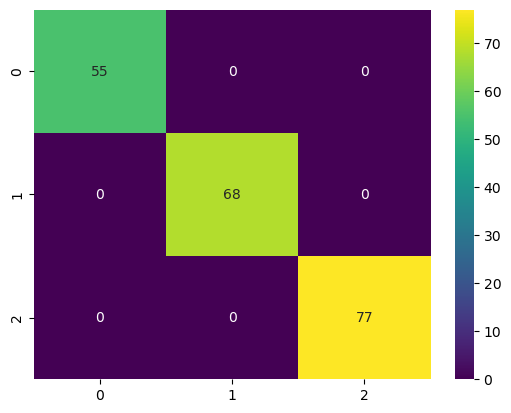

In [41]:
Y_predict=KN_model.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
sns.heatmap(cm,annot=True,cmap='viridis')

# SVM

In [42]:
model=SVC()
grid_svm_Param={'gamma':['scale','auto'],'C':[1,10,100],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid_svm=GridSearchCV(model,grid_svm_Param,cv=cv)

In [43]:
grid_svm.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [44]:
grid_svm.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [45]:
grid_svm.best_score_

1.0

In [46]:
SVM_model=grid_svm.best_estimator_
start_svm=time()
SVM_model.fit(X_train,Y_train)
end_svm=time()-start_svm

In [47]:
print('Score :',SVM_model.score(X_test,Y_test),'Temps d\'execution',end_svm)

Score : 1.0 Temps d'execution 0.015539407730102539


In [48]:
BestModel.append(['SVM',SVM_model.score(X_test,Y_test),end_svm])

In [49]:
BestModel

[['KNeighborClassifier', 1.0, 0.008019208908081055],
 ['SVM', 1.0, 0.015539407730102539]]

<Axes: >

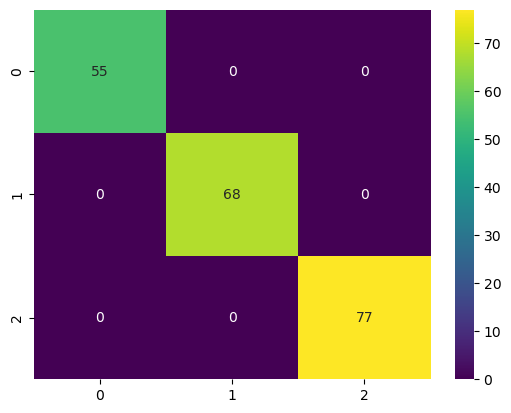

In [50]:
Y_predict=SVM_model.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
sns.heatmap(cm,annot=True,cmap='viridis')

# DecisionTreeClassifier

In [51]:
model=DecisionTreeClassifier()
grid_tree_Param={'criterion':['gini', 'entropy', 'log_loss'],'splitter':['best', 'random'],'max_depth':np.arange(1,20)}
grid_tree=GridSearchCV(model,grid_tree_Param,cv=cv)
grid_tree.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'splitter': ['best', 'random']})

In [52]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [53]:
grid_tree.best_score_

1.0

In [54]:
Tree_model=grid_tree.best_estimator_
start_Tree = time()
Tree_model.fit(X_train,Y_train)
end_Tree=time()-start_Tree

In [55]:
print('Score :',Tree_model.score(X_test,Y_test),'Temps d\'execution',end_Tree)

Score : 1.0 Temps d'execution 0.0


In [56]:
BestModel.append(['Tree',Tree_model.score(X_test,Y_test),end_Tree])

In [57]:
BestModel

[['KNeighborClassifier', 1.0, 0.008019208908081055],
 ['SVM', 1.0, 0.015539407730102539],
 ['Tree', 1.0, 0.0]]

<Axes: >

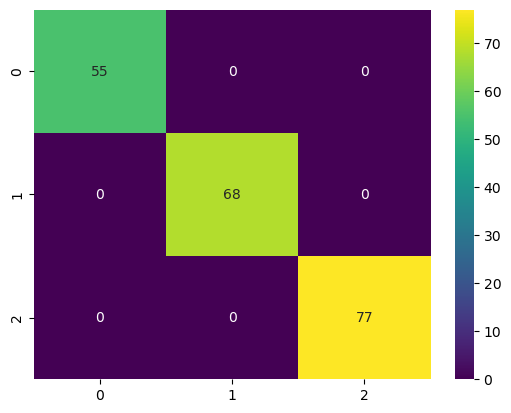

In [58]:
Y_predict=Tree_model.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
sns.heatmap(cm,annot=True,cmap='viridis')

# Comparaison des Models

In [59]:
BestModel1=pd.DataFrame(BestModel)

In [60]:
BestModel1

,0,1,2
0,KNeighborClassifier,1.0,0.008019
1,SVM,1.0,0.015539
2,Tree,1.0,0.000000


**Donc après l'experience, le Model DecisionTreeClassifier est le meilleur pour l'entrainement et aussi pour la prédiction** 